# 数据探索性分析与数据预处理

## 1. 问题描述

自行选择2个数据集进行探索性分析与预处理。




## 2. 数据集

所选数据集：[Wine Reviews][id]


* winemag-data_first150k.csv
  
    包含10列和15万条葡萄酒评论

    
[id]:"https://www.kaggle.com/zynicide/wine-reviews"

In [1]:
#导入库
import matplotlib
import numpy as np
import pandas as pd

In [2]:
#读取数据
path_15k = "../data/wine/winemag-data_first150k.csv"
data_15k = pd.read_csv(path_15k)

In [3]:
data_15k.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
data = data_15k.drop(columns=['Unnamed: 0','description'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   designation  105195 non-null  object 
 2   points       150930 non-null  int64  
 3   price        137235 non-null  float64
 4   province     150925 non-null  object 
 5   region_1     125870 non-null  object 
 6   region_2     60953 non-null   object 
 7   variety      150930 non-null  object 
 8   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 10.4+ MB


## 3. 数据分析要求
### 3.1. 数据可视化与摘要

#### 3.1.1. 数据摘要

* country: 葡萄酒来自的国家

* description: 
描述，不同葡萄酒的描述均不同，不考虑

* designation: 
酿酒厂内的葡萄园，酿酒的葡萄来自该葡萄园

* points: 
WineEnthusiast对葡萄酒的评分为1-100分（他们说，他们只发表分数大于等于80的葡萄酒的评论）

* price: 
一瓶酒的成本

* province: 
葡萄酒来自的省份/州

* region_1: 
葡萄酒产区（省份/州）

* region_2: 
有时，在葡萄酒种植区中指定了更特定的区域（例如，纳帕谷内的卢瑟福），但是此值有时可以为空

* variety: 
用于酿造葡萄酒的葡萄类型（即黑比诺）

* winery: 
酿造葡萄酒的酿酒厂

标称属性，给出每个可能取值的频数。

country
US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12


<AxesSubplot:>

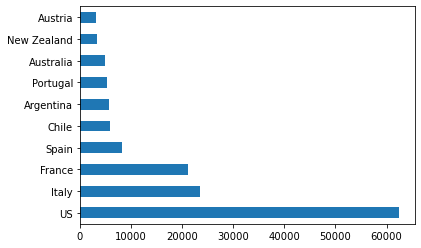

In [5]:
#由于功能重复，仅显示一个标称属性‘country’的频数统计和可视化，可通过更改i的值显示其他属性
i=0
print(data.columns[i])
print(getattr(data, data.columns[i]).value_counts())
data[data.columns[i]].value_counts().head(10).plot.barh()

 数值属性，给出5数概括及缺失值的个数。

In [6]:
data.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


可得两个数值属性points与price的五数概括如下：


* points：


    最小值：80

    最大值：100

    四分位数（Q1）：86

    中位数：88

    四分位数（Q3）：91



* price：


    最小值：4

    最大值：2300

    四分位数（Q1）：16

    中位数：24

    四分位数（Q3）：40


In [7]:
#缺失值个数统计
print('points:',data['points'].isnull().sum())
print('price:',data['price'].isnull().sum())

points: 0
price: 13695


#### 3.1.2. 数据可视化

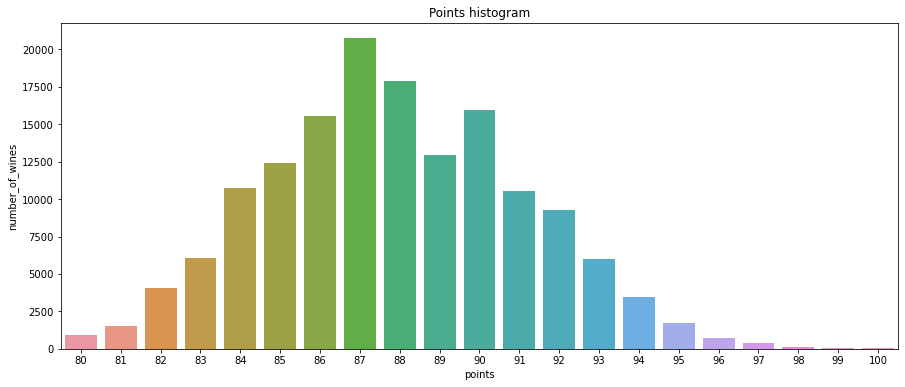

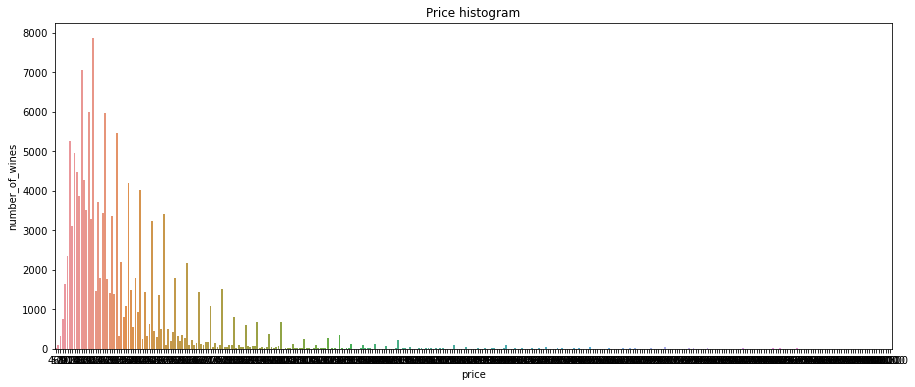

In [8]:
#直方图
import seaborn as sns
import matplotlib.pyplot as plt

def histogram(data, x, y ,title):
    plt.figure(figsize = (15,6))
    plt.title(title)
    sns.set_color_codes("pastel")
    sns.barplot(x=x, y=y, data=df)
    locs, labels = plt.xticks()
    plt.show()

#points
temp = data['points'].value_counts()
df = pd.DataFrame({'points':temp.index, 'number_of_wines':temp.values})

histogram(df, 'points', 'number_of_wines', 'Points histogram')

#price
temp = data['price'].value_counts()
df = pd.DataFrame({'price':temp.index, 'number_of_wines':temp.values})

histogram(df, 'price', 'number_of_wines', 'Price histogram')

由于price集中在图的左侧，为了便于观察price的变化，只考虑<200的price，重新绘制直方图

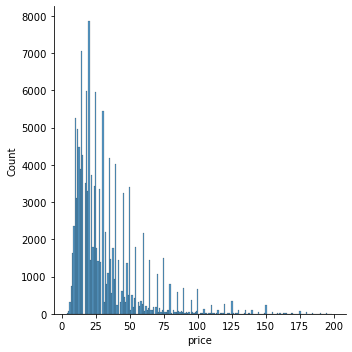

In [9]:
#price(<200)
temp = sns.displot(data[data["price"]<200]['price'])

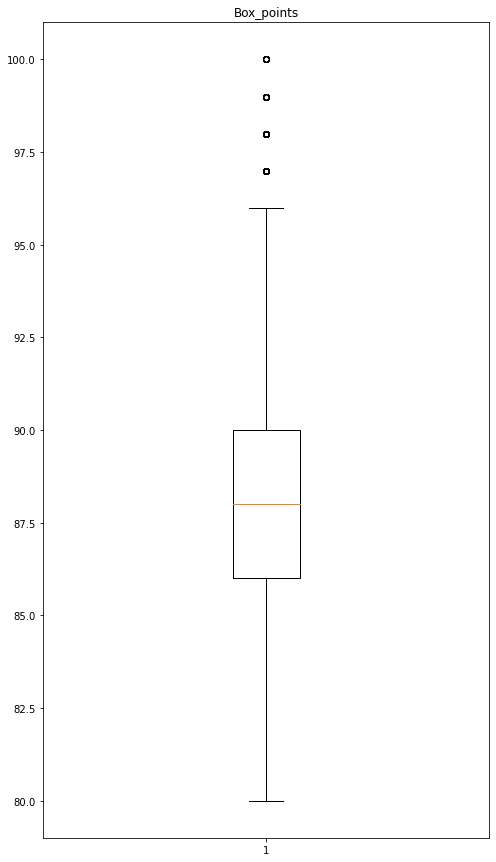

In [10]:
#盒图
#points
fig = plt.figure(figsize=(8, 15))
plt.boxplot(data['points'], notch=False, sym='o', vert=True)
t = plt.title('Box_points')
plt.show()

同样为了便于观察price的变化，只考虑<200的price，重新绘制盒图

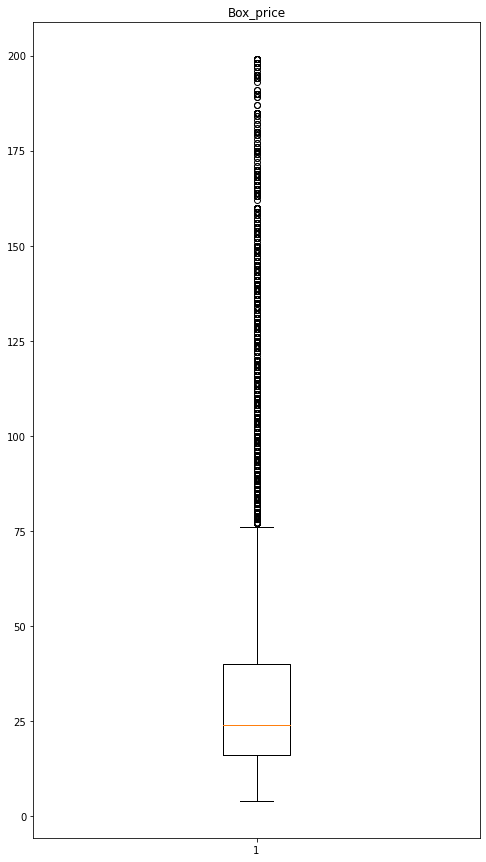

In [11]:
#price
fig = plt.figure(figsize=(8, 15))
plt.boxplot(data['price'].loc[data['price']<200], notch=False, sym='o', vert=True)
t = plt.title('Box_price')
plt.show()

### 3.2. 数据缺失的处理

观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理。

#### 3.2.1. 将缺失部分剔除

In [12]:
#将缺失部分剔除函数
def modify_delete(data):
    data_delete = data.dropna()
    return data_delete

In [13]:
#以points为例
data_delete = modify_delete(data['points'])

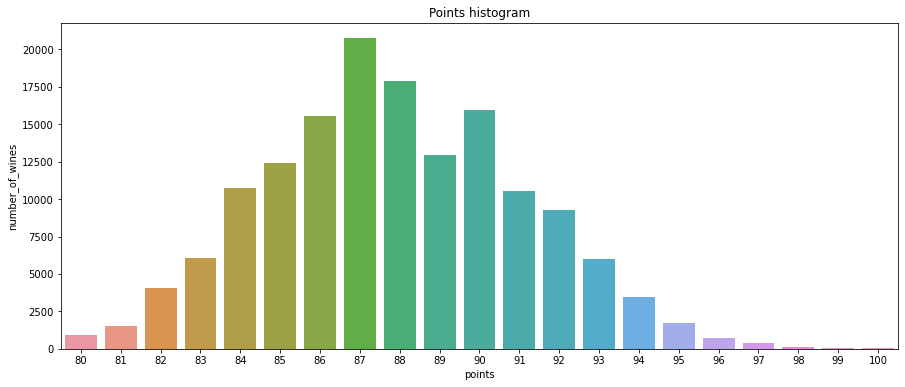

In [14]:
#直方图
temp = data_delete.value_counts()
df = pd.DataFrame({'points':temp.index, 'number_of_wines':temp.values})

histogram(df, 'points', 'number_of_wines', 'Points histogram')

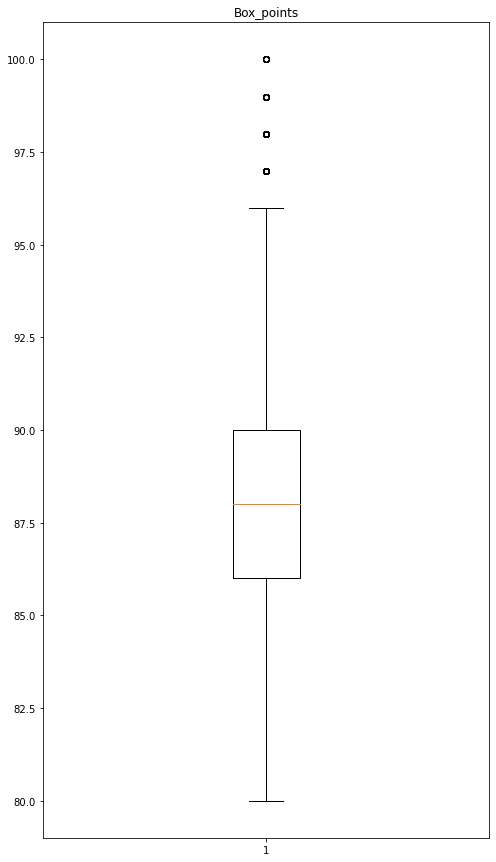

In [15]:
#盒图
fig = plt.figure(figsize=(8, 15))
plt.boxplot(data_delete, notch=False, sym='o', vert=True)
t = plt.title('Box_points')
plt.show()

#### 3.2.2. 用最高频率值来填补缺失值

In [16]:
#以最高频率值填补缺失值函数
def modify_most(data):
    temp = data.mode()[0]    #求众数
    data_most = data.fillna(temp)
    return data_most

In [17]:
#以points为例
data_most = modify_most(data['points'])

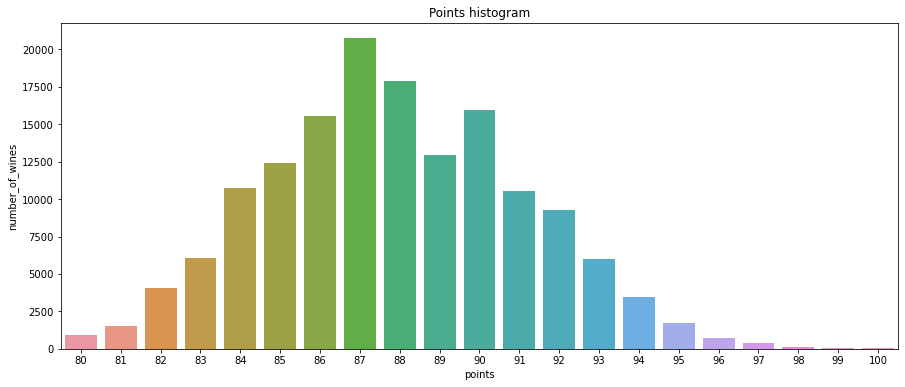

In [18]:
#直方图
temp = data_most.value_counts()
df = pd.DataFrame({'points':temp.index, 'number_of_wines':temp.values})

histogram(df, 'points', 'number_of_wines', 'Points histogram')

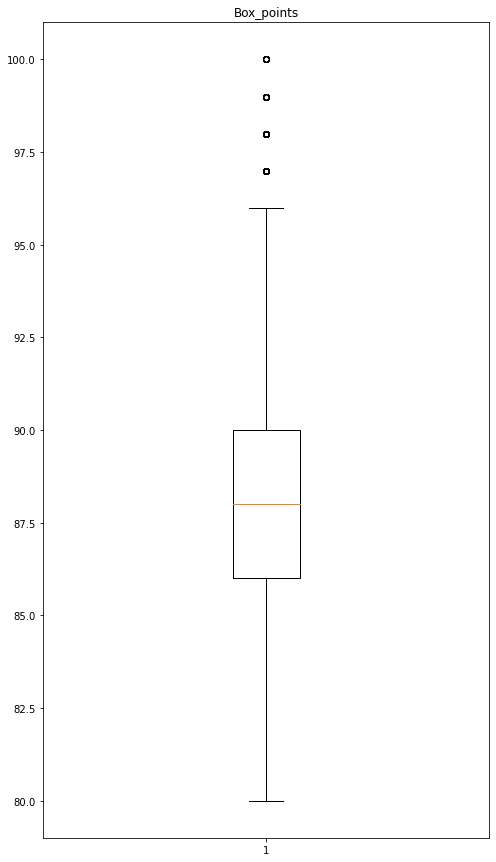

In [19]:
#盒图
fig = plt.figure(figsize=(8, 15))
plt.boxplot(data_most, notch=False, sym='o', vert=True)
t = plt.title('Box_points')
plt.show()

#### 3.2.3. 通过属性的相关关系来填补缺失值

葡萄酒来自的国家与葡萄酒来自的省份必然相关，可以使用province填补country。
但经过查看缺失值数量，province与country均缺失5个数据，有理由认为无法有效填充。
因此，选用仅缺失5个数据的province对缺失超过2万数据的region_1（葡萄酒产区，为省份/州，与province相同）进行填充。

In [20]:
print("country null : ",data['country'].isnull().sum())
print("province null : ",data['province'].isnull().sum())
print("region_1 null : ",data['region_1'].isnull().sum())
data[data["country"].isnull()]

country null :  5
province null :  5
region_1 null :  25060


,country,designation,points,price,province,region_1,region_2,variety,winery
1133,NaN,Askitikos,90,17.0,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,NaN,Shah,90,30.0,NaN,NaN,NaN,Red Blend,Büyülübağ
68226,NaN,Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
113016,NaN,Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
135696,NaN,Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas


In [21]:
data_fill = pd.DataFrame(data, columns=['province', 'region_1'])

In [22]:
data_fill.head(10)

,province,region_1
0,California,Napa Valley
1,Northern Spain,Toro
2,California,Knights Valley
3,Oregon,Willamette Valley
4,Provence,Bandol
5,Northern Spain,Toro
6,Northern Spain,Toro
7,Northern Spain,Toro
8,Oregon,Chehalem Mountains
9,California,Sonoma Coast


<AxesSubplot:>

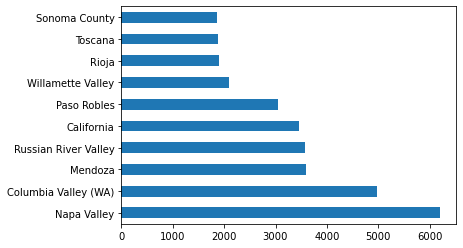

In [23]:
data_fill['region_1'].value_counts().head(10).plot.barh()

In [24]:
dict = {}
for row in data_fill.iterrows():
    dict[row[1]['province']] = row[1]['region_1']
    
for row in data_fill.iterrows():
    region = dict[row[1]['province']]
    row[1]['region_1'] = region

<AxesSubplot:>

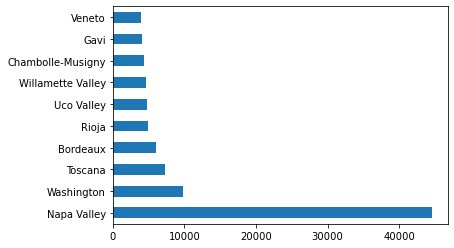

In [25]:
data_fill['region_1'].value_counts().head(10).plot.barh()

可对比填充前后 region_1属性 的各种可能（只显示前十名）频数的变化。

#### 3.2.4. 通过数据对象之间的相似性来填补缺失值

In [26]:
data_sim = data[['price','points']]

In [27]:
point2price = {}
for row in data_sim.iterrows():
    if point2price.get(row[1]['points'], None):
        if not pd.isnull(row[1]['price']):
            point2price[row[1]['points']][0] += row[1]['price']
            point2price[row[1]['points']][1] += 1
    else:
        if not pd.isnull(row[1]['price']):
            point2price[row[1]['points']] = [row[1]['price'], 1]

In [28]:
for k in point2price.keys():
    point2price[k][0] = round(point2price[k][0] / point2price[k][1], 4)

In [29]:
for row in data_sim.iterrows():
    if pd.isnull(row[1]['price']):
        row[1]['price'] = point2price[row[1]['points']][0]

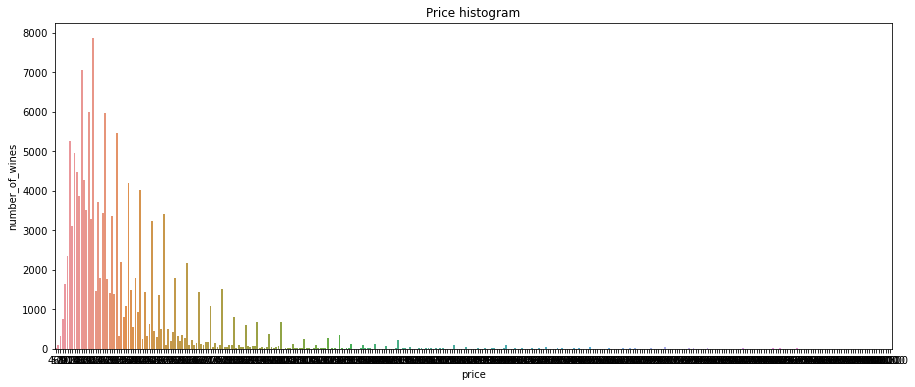

In [30]:
#对被填充后的price画直方图
temp = data_sim['price'].value_counts()
df = pd.DataFrame({'price':temp.index, 'number_of_wines':temp.values})

histogram(df, 'price', 'number_of_wines', 'Price histogram')